ocroline
========

An LSTM/CTC-based text line recognizer for printed text.

In order to run this, you need a model. You can download a trained model
for English from here:

    https://storage.googleapis.com/tmb-models/line2-000003330-004377.pt

Training is carried out using the `ocroline-train` command line
program. This takes inputs in the form of tar files of training
data as defined by [dlinputs](https://github.com/NVlabs/dlinputs).

Recognition is carried out using the `ocroline.LineRecognizer` class.

Note that `ocroline` requires a GPU for training, and the code currently also assumes a GPU for inference (although you could probably run the inference code without a GPU).

There are some requirements for installation.

In [1]:
%%bash
cat requirements.txt

-e git://github.com/NVlabs/dlinputs.git#egg=dlinputs
-e git://github.com/NVlabs/dltrainers.git#egg=dltrainers
-e git://github.com/tmbdev/cctc.git#egg=cctc
editdistance


# Training

Training files are just tar files containing `.png` and corresponding `.txt` files with the ground truth.

In [2]:
%%bash
tar -ztvf testdata/testlines.tgz | sed 6q

-rw-rw-r-- tmb/tmb           1 2018-03-24 23:57 000000.index
-rw-rw-r-- tmb/tmb        1470 2018-03-24 23:57 000000.png
-rw-rw-r-- tmb/tmb          19 2018-03-24 23:57 000000.txt
-rw-rw-r-- tmb/tmb           1 2018-03-24 23:57 000001.index
-rw-rw-r-- tmb/tmb         424 2018-03-24 23:57 000001.png
-rw-rw-r-- tmb/tmb           3 2018-03-24 23:57 000001.txt


tar: write error


This is read internally using the `dlinputs` library. This library is also used for training and has a large number of options for conversions, batching, and data augmentation.

In [3]:
%pylab inline
rc("image", cmap="gray", interpolation="bicubic")

Populating the interactive namespace from numpy and matplotlib


Continuum Mechanics


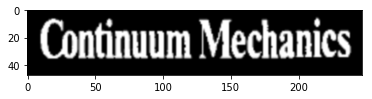

In [4]:
from dlinputs import tarrecords
sample = tarrecords.tariterator(open("testdata/testlines.tgz")).next()
print sample["txt"]
imshow(sample["png"])

The training data for the line recognizer needs to be sized normalized. You can use the functions in `lineest.CenterLineNormalizer` for that. In this training set, the data is already normalized.

In [5]:
%%bash
ocroline-train -d testdata/testlines.tgz -t testdata/testlines.tgz -T 100 -o testmodel --epochs 1

['CenterNormalizer', 'LineRecognizer', '__builtins__', '__doc__', '__file__', '__name__', '__package__', '__path__', 'lineest', 'recognizer']
__key__ <type 'list'> ['000006', '000007', '000008', '000009', '000010']
__source__ <type 'list'> ['testdata/testlines.tgz', 'testdata/testlines.tgz', 'testda
_bucket 12
image float64 (5, 48, 1295, 1)
transcript float64 (5, 159, 97)
input (3L, 48L, 20L, 1L)
output (3L, 20L, 97L)
Sequential(
  (0): Reorder BHWD->BDHW
  (1): CheckSizes [(0, 900), (1, 1), (48, 48), (0, 9000)]
  (2): Conv2d(1, 100, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU()
  (4): Reshape((0, [1, 2], 3))
  (5): CheckSizes [(0, 900), (0, 5000), (0, 9000)]
  (6): LSTM1:LSTM(4800, 100, bidirectional=1)
  (7): Conv1d(200, 97, kernel_size=(1,), stride=(1,))
  (8): Reorder BDW->BWD
  (9): CheckSizes [(0, 900), (0, 9000), (97, 97)]
)
# 5
TRU body fill a region in a four-dimensional Preisach space. A thermodynamical
ALN 
PRE Z
testset 100 1.0
saving as testmodel-0000000

Note that `ocroline-train` uses the convention that all models are saved as `prefix-000000000-000000.pt`, where the first number is the number of training samples used for training (in thousands) and the second number is the error rate times one million.

# Line Recognition

In [2]:
%%bash
model=line2-000003330-004377.pt
test -f $model || wget --quiet -nd https://storage.googleapis.com/tmb-models/$model

The `LineRecognizer` class wraps up the line recognizer in a small, simple-to-use class. This class will always perform line normalization on its input. It can also perform batching of multiple lines if you want to recognize multiple lines together.

In [7]:
import ocroline
rec = ocroline.LineRecognizer("line2-000003330-004377.pt")
rec.model

Sequential(
  (0): Reorder BHWD->BDHW
  (1): CheckSizes [(0, 900), (1, 1), (48, 48), (0, 9000)]
  (2): Conv2d(1, 100, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): BatchNorm2d(100, eps=1e-05, momentum=0.1, affine=True)
  (4): ReLU()
  (5): MaxPool2d(kernel_size=(2, 1), stride=(2, 1), dilation=(1, 1), ceil_mode=False)
  (6): Conv2d(100, 200, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): BatchNorm2d(200, eps=1e-05, momentum=0.1, affine=True)
  (8): ReLU()
  (9): Reshape((0, [1, 2], 3))
  (10): CheckSizes [(0, 900), (0, 5000), (0, 9000)]
  (11): LSTM1:LSTM(4800, 200, bidirectional=1)
  (12): Conv1d(400, 97, kernel_size=(1,), stride=(1,))
  (13): Reorder BDW->BWD
  (14): CheckSizes [(0, 900), (0, 9000), (97, 97)]
)

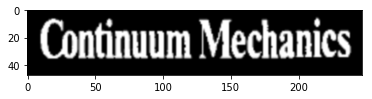

In [8]:
imshow(sample["png"])

In [9]:
rec.recognize_line(sample["png"])

'Continuum Mechanics'